Build a regression model.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# The data collected from joining_data.
with open('bike_yelp_fs_outdoor_db.csv') as x:
    ncols = len(x.readline().split(','))
bike_yelp_fs_db = pd.read_csv('bike_yelp_fs_outdoor_db.csv', usecols=range(1,ncols))
bike_yelp_fs_db

,citybike_index,empty_slots,free_bikes,review_count,rating,category_name,distance
0,0,3,16,10.0,4.0,Park,379.0
1,0,3,16,10.0,4.0,Sports and Recreation,379.0
2,0,3,16,10.0,4.0,Park,791.0
3,0,3,16,10.0,4.0,Beach,941.0
4,0,3,16,10.0,4.0,Park,845.0
...,...,...,...,...,...,...,...
46362,673,19,0,NaN,NaN,Dog Park,372.0
46363,673,19,0,NaN,NaN,Bathing Area,866.0
46364,673,19,0,NaN,NaN,Farm,88.0
46365,673,19,0,NaN,NaN,Hiking Trail,687.0


In [27]:
# Right now there are too many duplicate data points
bike_yelp_fs_db[['empty_slots',	'free_bikes', 'review_count', 'rating',	'distance']].describe()

,empty_slots,free_bikes,review_count,rating,distance
count,46367.000000,46367.00000,44286.000000,44286.000000,46366.000000
mean,8.899303,9.67410,21.736192,3.758513,580.508821
std,6.509382,6.63962,94.476266,0.850787,357.829003
min,0.000000,0.00000,1.000000,1.000000,6.000000
25%,4.000000,4.00000,1.000000,3.000000,370.000000
50%,8.000000,9.00000,4.000000,4.000000,563.000000
75%,13.000000,14.00000,11.000000,4.500000,780.000000
max,38.000000,36.00000,869.000000,5.000000,5339.000000


In [28]:
# The missing data and null values
total = bike_yelp_fs_db.isnull().sum().sort_values(ascending=False)
percent = (bike_yelp_fs_db.isnull().sum()/bike_yelp_fs_db.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
review_count,2081,0.044881
rating,2081,0.044881
category_name,1,0.000022
distance,1,0.000022
citybike_index,0,0.000000
empty_slots,0,0.000000
free_bikes,0,0.000000


In [121]:
bike_fs_df = bike_yelp_fs_db[['citybike_index', 'empty_slots', 'free_bikes', 'category_name', 'distance']]
bike_fs_df = bike_fs_df.dropna()
bike_fs_df[bike_fs_df['distance'].isna()]
bike_fs_df = bike_fs_df.drop_duplicates()

In [122]:
print( bike_fs_df[['citybike_index', 'empty_slots', 'free_bikes']].drop_duplicates().reset_index(drop=True) )

     citybike_index  empty_slots  free_bikes
0                 0            3          16
1                 1           13           2
2                 2            9          14
3                 3            9          15
4                 4            9          18
..              ...          ...         ...
668             669           11           3
669             670           18           1
670             671           13           1
671             672           15           0
672             673           19           0

[673 rows x 3 columns]


In [116]:
number_of_stations_near_cat = bike_fs_df.groupby('category_name').citybike_index.count()
print(number_of_stations_near_cat.sort_values(ascending=False).head(20))

category_name
Park                           2671
Playground                      810
Sports and Recreation           508
Monument                        411
Dog Park                        320
Garden                          261
Landmarks and Outdoors          257
Plaza                           225
Other Great Outdoors            177
Hiking Trail                    172
Urban Park                      163
Scenic Lookout                  134
Beach                           118
Historic and Protected Site      92
Rock Climbing Spot               81
Structure                        81
Campground                       71
Bridge                           70
Lake                             66
Harbor or Marina                 62
Name: citybike_index, dtype: int64


In [117]:
bike_fs_df[bike_fs_df.category_name == 'Park'].distance

0         379.0
2         791.0
4         845.0
12        173.0
120       505.0
          ...  
46350    1039.0
46352     932.0
46354     513.0
46355     676.0
46357     965.0
Name: distance, Length: 2671, dtype: float64

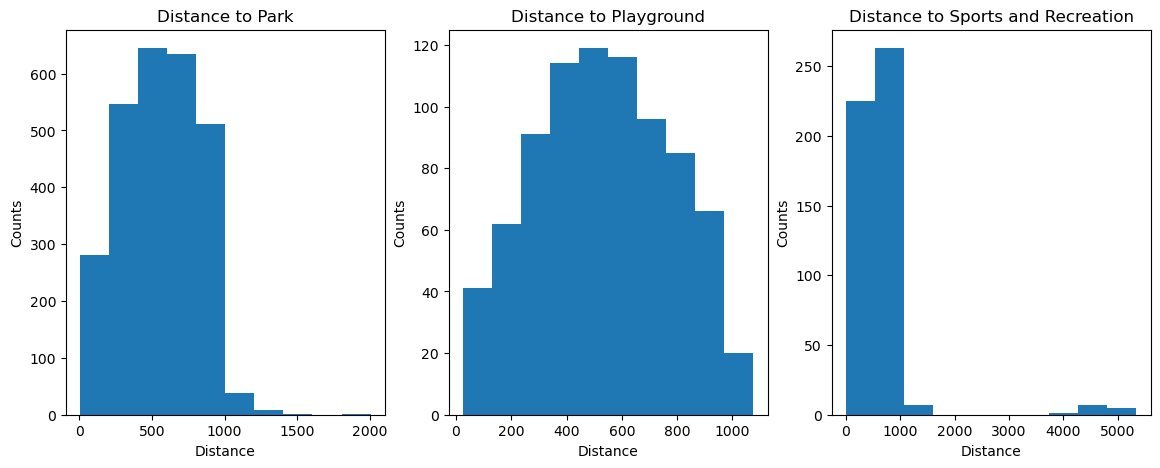

In [118]:
# Check the data to find outliers and to see if the data is normalized.
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Distance to Park histogram
axes[0].hist(bike_fs_df[bike_fs_df.category_name == 'Park'].distance)
# Customize other aspects of the plot
axes[0].set_title('Distance to Park')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Counts')

# Distance to Playground histogram
axes[1].hist(bike_fs_df[bike_fs_df.category_name == 'Playground'].distance)
axes[1].set_title('Distance to Playground')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Counts')

# Distance to Sports and Recreation histogram
axes[2].hist(bike_fs_df[bike_fs_df.category_name == 'Sports and Recreation'].distance)
axes[2].set_title('Distance to Sports and Recreation')
axes[2].set_xlabel('Distance')
axes[2].set_ylabel('Counts')

plt.show()

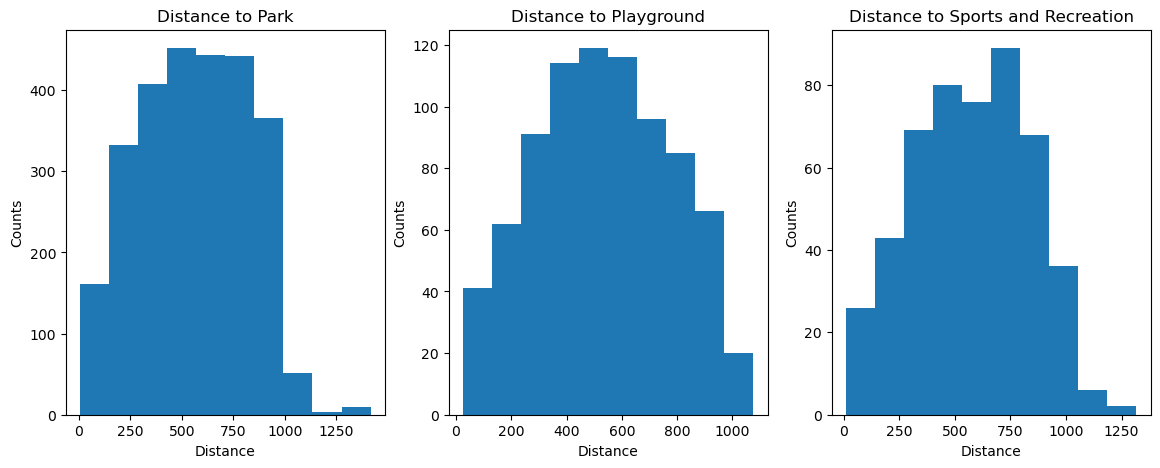

In [119]:
# Remove the outliers and put the data into new df, bike_fs_df_w_top3cat
# The data is more normailzed now.

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Distance to Park histogram
axes[0].hist(bike_fs_df[(bike_fs_df.category_name == 'Park') & (bike_fs_df.distance <= 1500)].distance)
# Customize other aspects of the plot
axes[0].set_title('Distance to Park')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Counts')

# Distance to Playground histogram
axes[1].hist(bike_fs_df[bike_fs_df.category_name == 'Playground'].distance)
axes[1].set_title('Distance to Playground')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Counts')

# Distance to Sports and Recreation histogram
axes[2].hist(bike_fs_df[(bike_fs_df.category_name == 'Sports and Recreation') & (bike_fs_df.distance <= 2000)].distance)
axes[2].set_title('Distance to Sports and Recreation')
axes[2].set_xlabel('Distance')
axes[2].set_ylabel('Counts')

plt.show()

In [124]:
# Remove the outliers
index_park_dist = bike_fs_df[(bike_fs_df.category_name == 'Park') & (bike_fs_df.distance > 1500)].index
bike_fs_df.drop(index_park_dist, inplace=True)
index_park_dist = bike_fs_df[(bike_fs_df.category_name == 'Sports and Recreation') & (bike_fs_df.distance > 2000)].index
bike_fs_df.drop(index_park_dist, inplace=True)
bike_fs_df

,citybike_index,empty_slots,free_bikes,category_name,distance
0,0,3,16,Park,379.0
1,0,3,16,Sports and Recreation,379.0
2,0,3,16,Park,791.0
3,0,3,16,Beach,941.0
4,0,3,16,Park,845.0
...,...,...,...,...,...
46362,673,19,0,Dog Park,372.0
46363,673,19,0,Bathing Area,866.0
46364,673,19,0,Farm,88.0
46365,673,19,0,Hiking Trail,687.0


In [125]:
# Make a new df with the top 3 categories
bike_fs_df_w_top3cat = bike_fs_df[['citybike_index', 'empty_slots', 'free_bikes']].drop_duplicates().reset_index(drop=True)
bike_fs_df_w_top3cat['num_parks'] = bike_fs_df[bike_fs_df.category_name == 'Park'].groupby('citybike_index')['category_name'].count()
bike_fs_df_w_top3cat['ave_dis_park'] = bike_fs_df[bike_fs_df.category_name == 'Park'].groupby('citybike_index')['distance'].mean()
bike_fs_df_w_top3cat['num_plygrd'] = bike_fs_df[bike_fs_df.category_name == 'Playground'].groupby('citybike_index')['category_name'].count()
bike_fs_df_w_top3cat['ave_dis_plygrd'] = bike_fs_df[bike_fs_df.category_name == 'Playground'].groupby('citybike_index')['distance'].mean()
bike_fs_df_w_top3cat['num_sr'] = bike_fs_df[bike_fs_df.category_name == 'Sports and Recreation'].groupby('citybike_index')['category_name'].count()
bike_fs_df_w_top3cat['ave_dis_sr'] = bike_fs_df[bike_fs_df.category_name == 'Sports and Recreation'].groupby('citybike_index')['distance'].mean()
bike_fs_df_w_top3cat[['num_parks', 'num_plygrd', 'num_sr']] = bike_fs_df_w_top3cat[['num_parks', 'num_plygrd', 'num_sr']].fillna(0)

In [127]:
bike_fs_df_w_top3cat

,citybike_index,empty_slots,free_bikes,num_parks,ave_dis_park,num_plygrd,ave_dis_plygrd,num_sr,ave_dis_sr
0,0,3,16,4.0,547.00,2.0,150.500000,1.0,379.000000
1,1,13,2,4.0,479.75,1.0,61.000000,0.0,NaN
2,2,9,14,4.0,590.75,2.0,303.000000,1.0,257.000000
3,3,9,15,2.0,457.00,0.0,NaN,1.0,472.000000
4,4,9,18,2.0,753.50,1.0,749.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...
668,669,11,3,5.0,512.80,3.0,548.000000,1.0,733.000000
669,670,18,1,4.0,637.00,0.0,NaN,1.0,796.000000
670,671,13,1,5.0,658.00,3.0,967.333333,1.0,888.000000
671,672,15,0,4.0,617.75,4.0,484.000000,1.0,779.000000


In [139]:
bike_yelp_df = bike_yelp_fs_db[['citybike_index', 'review_count', 'rating']]
bike_yelp_df = bike_yelp_df.drop_duplicates()
# bike_yelp_df = bike_yelp_df.dropna(axis=0)
bike_yelp_df.head(20)

,citybike_index,review_count,rating
0,0,10.0,4.0
15,0,1.0,5.0
30,0,11.0,3.0
45,0,26.0,4.5
60,0,30.0,3.5
75,0,1.0,2.0
90,0,3.0,3.0
105,0,2.0,3.5
120,1,7.0,3.5
130,1,6.0,3.0


In [140]:
# This dataframe, 'bike_yelp_rat_sum_df', groups by the citybike_index to count the number of reviews for each rating.
df2 = bike_yelp_df[bike_yelp_df['review_count'].notnull()]
bike_yelp_rat_sum_df = df2.groupby(['citybike_index', 'rating']).review_count.sum().reset_index()
bike_yelp_rat_sum_df

,citybike_index,rating,review_count
0,0,2.0,1.0
1,0,3.0,14.0
2,0,3.5,32.0
3,0,4.0,10.0
4,0,4.5,26.0
...,...,...,...
2010,490,4.5,95.0
2011,490,5.0,9.0
2012,491,4.5,11.0
2013,491,5.0,1.0


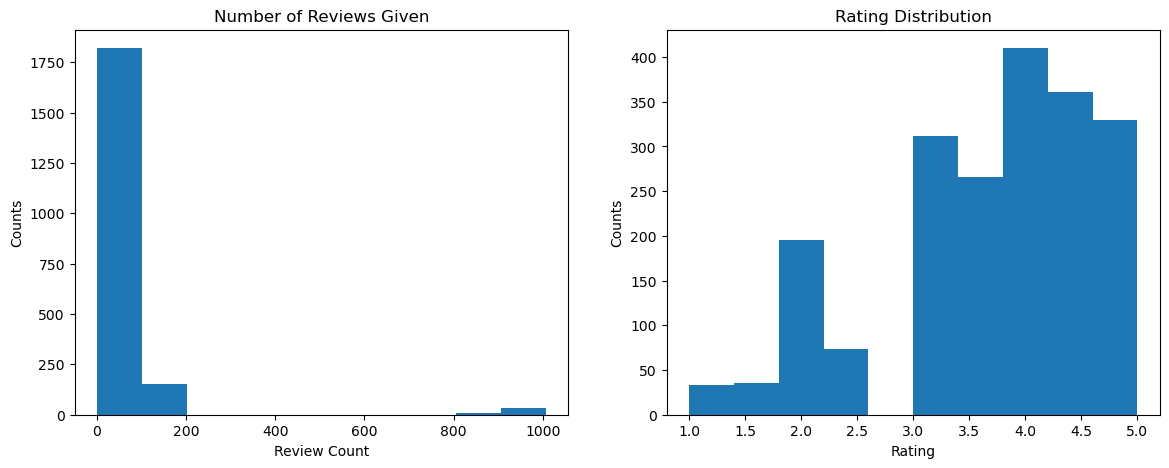

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distance to Park histogram
axes[0].hist(bike_yelp_rat_sum_df.review_count)
# Customize other aspects of the plot
axes[0].set_title('Number of Reviews Given')
axes[0].set_xlabel('Review Count')
axes[0].set_ylabel('Counts')

# Distance to Park histogram
axes[1].hist(bike_yelp_rat_sum_df.rating)
axes[1].set_title('Rating Distribution')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Counts')

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Distance to Park histogram
axes[0].hist(bike_fs_df[bike_fs_df.category_name == 'Park'].distance)
# Customize other aspects of the plot
axes[0].set_title('Distance to Park')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Counts')

# Distance to Park histogram
axes[1].hist(bike_fs_df[bike_fs_df.category_name == 'Playground'].distance)
axes[1].set_title('Distance to Playground')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Counts')

# Distance to Park histogram
axes[2].hist(bike_fs_df[bike_fs_df.category_name == 'Sports and Recreation'].distance)
axes[2].set_title('Distance to Sports and Recreation')
axes[2].set_xlabel('Distance')
axes[2].set_ylabel('Counts')

plt.show()

In [11]:
bike_yelp_fs_db.corr()

,citybike_index,empty_slots,free_bikes,review_count,rating,distance
citybike_index,1.000000,0.083796,0.043902,-0.009783,-0.013760,0.045574
empty_slots,0.083796,1.000000,-0.452856,-0.014371,0.010152,0.031136
free_bikes,0.043902,-0.452856,1.000000,0.059004,-0.007265,-0.030073
review_count,-0.009783,-0.014371,0.059004,1.000000,0.069300,0.012961
rating,-0.013760,0.010152,-0.007265,0.069300,1.000000,-0.010436
distance,0.045574,0.031136,-0.030073,0.012961,-0.010436,1.000000


In [18]:
bike_yelp_df.corr()

,citybike_index,empty_slots,free_bikes,review_count,rating
citybike_index,1.000000,0.077816,0.051038,-0.008098,-0.009370
empty_slots,0.077816,1.000000,-0.444224,-0.015079,0.010515
free_bikes,0.051038,-0.444224,1.000000,0.061162,-0.009895
review_count,-0.008098,-0.015079,0.061162,1.000000,0.069504
rating,-0.009370,0.010515,-0.009895,0.069504,1.000000


Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?